In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
ns = [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,
    0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,
    0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = 1000
h = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

ns01 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_0.1_dominance_0.5.csv')
ns1 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_1_dominance_0.5.csv')
ns5 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_5_dominance_0.5.csv')
ns10 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_10_dominance_0.5.csv')
ns100 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_100_dominance_0.5.csv')

In [43]:
# Combine dataframes
combined_df = pd.concat([ns01, ns1, ns5, ns10, ns100], keys=['ns01', 'ns1', 'ns5', 'ns10', 'ns100'], names=['ns', 'index']).reset_index(level='ns')

# Convert 't' column to numeric values
combined_df['t'] = pd.to_numeric(combined_df['t'], errors='coerce')

# Calculate log10 of 'count', 't', and 'count*s*h'
combined_df['log10_count'] = np.log10(combined_df['count'])
combined_df['log10_t'] = np.log10(combined_df['t'])
combined_df['count_s_h'] = combined_df['count'] * combined_df['s'] * combined_df['h']
combined_df['log10_count_s_h'] = np.log10(combined_df['count_s_h'])


In [44]:
combined_df

,ns,count,h,n,s,t,log10_count,log10_t,count_s_h,log10_count_s_h
index,,,,,,,,,,
0,ns01,1,0.5,1000,0.0001,1.0,0.000000,0.000000,0.00005,-4.301030
1,ns01,4,0.5,1000,0.0001,3.0,0.602060,0.477121,0.00020,-3.698970
2,ns01,1,0.5,1000,0.0001,1.0,0.000000,0.000000,0.00005,-4.301030
3,ns01,27,0.5,1000,0.0001,8.0,1.431364,0.903090,0.00135,-2.869666
4,ns01,17,0.5,1000,0.0001,11.0,1.230449,1.041393,0.00085,-3.070581
...,...,...,...,...,...,...,...,...,...,...
199995,ns100,1,0.5,1000,0.1000,1.0,0.000000,0.000000,0.05000,-1.301030
199996,ns100,1,0.5,1000,0.1000,1.0,0.000000,0.000000,0.05000,-1.301030
199997,ns100,8,0.5,1000,0.1000,7.0,0.903090,0.845098,0.40000,-0.397940


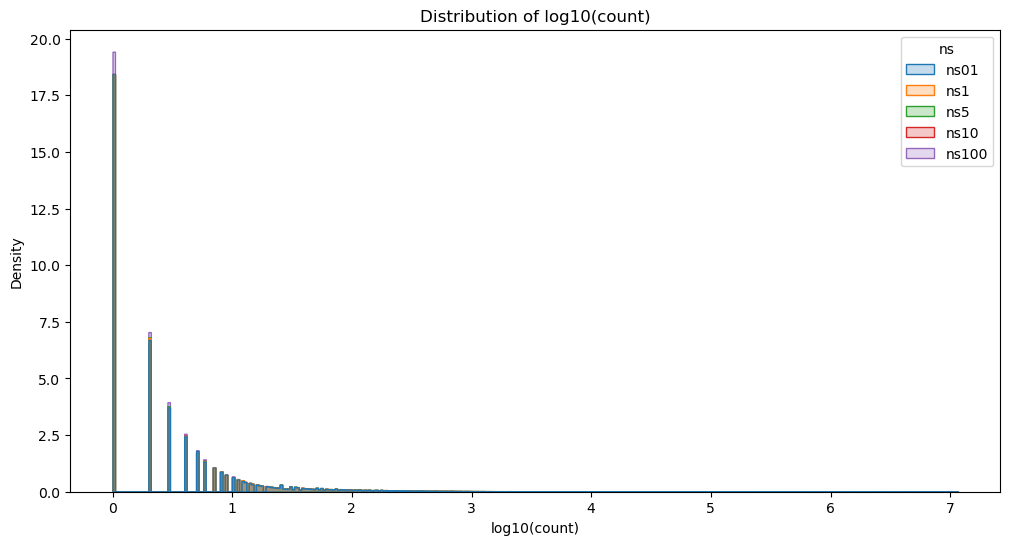

In [45]:

# Plot the distribution of log10(count)
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='log10_count', hue='ns', element='step', stat='density', common_norm=False)
plt.xlabel('log10(count)')
plt.ylabel('Density')
plt.title('Distribution of log10(count)')
plt.show()


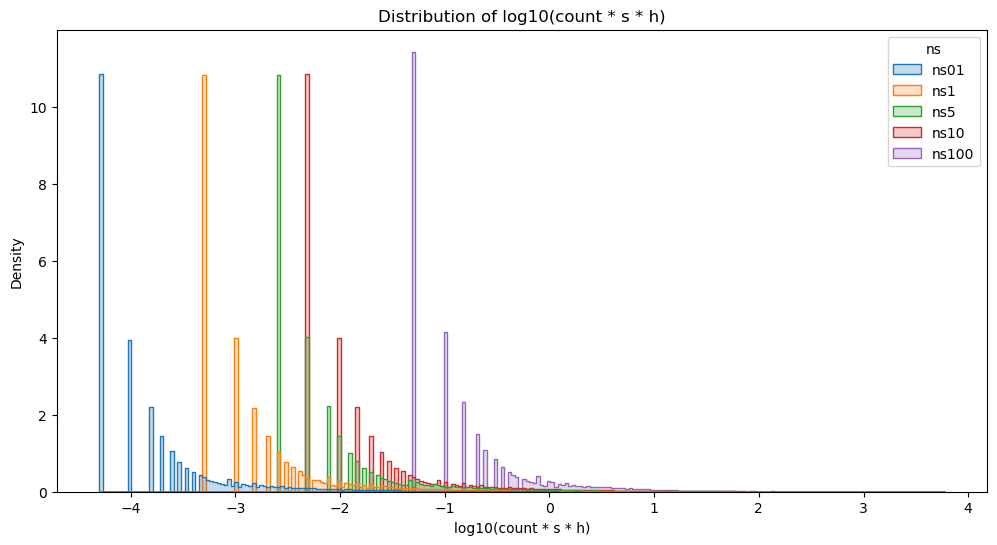

In [46]:

# Plot the distribution of log10(count*s*h)
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='log10_count_s_h', hue='ns', element='step', stat='density', common_norm=False)
plt.xlabel('log10(count * s * h)')
plt.ylabel('Density')
plt.title('Distribution of log10(count * s * h)')
plt.show()

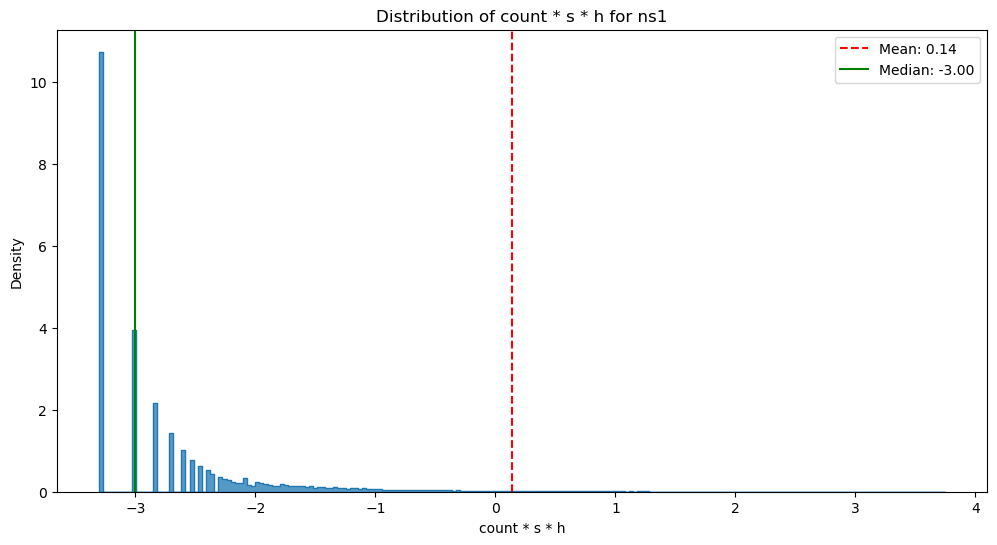

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns1'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns1')
mean_value = combined_df[combined_df['ns']=='ns1']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns1']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {np.log10(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {np.log10(median_value):.2f}')
plt.legend()
plt.show()

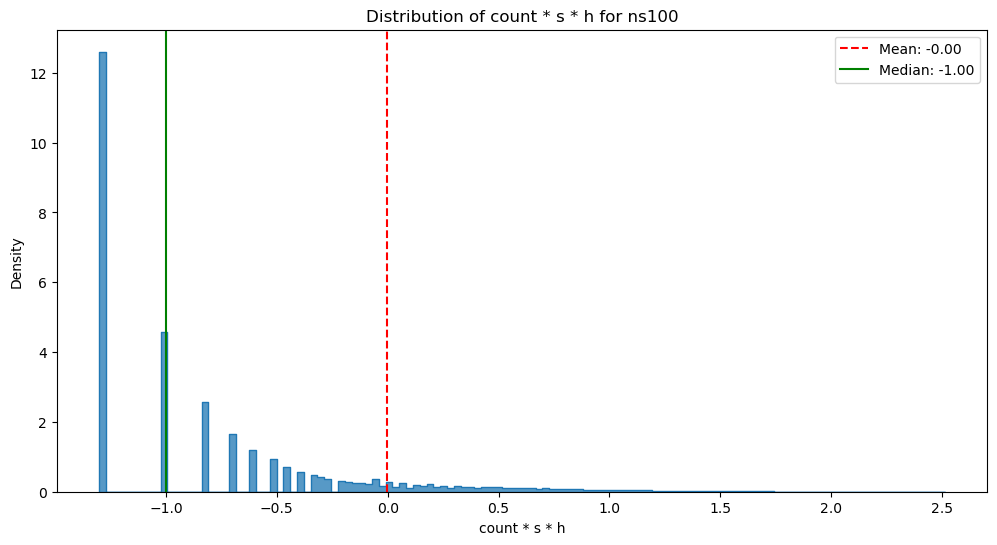

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns100'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns100')
mean_value = combined_df[combined_df['ns']=='ns100']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns100']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {np.log10(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {np.log10(median_value):.2f}')
plt.legend()
plt.show()

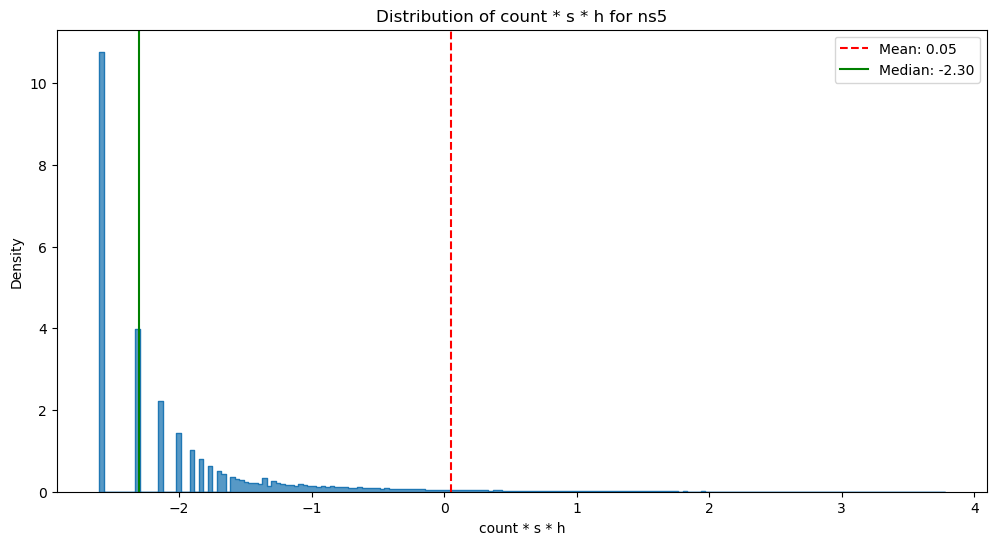

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns5'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns5')
mean_value = combined_df[combined_df['ns']=='ns5']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns5']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {np.log10(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {np.log10(median_value):.2f}')
plt.legend()
plt.show()

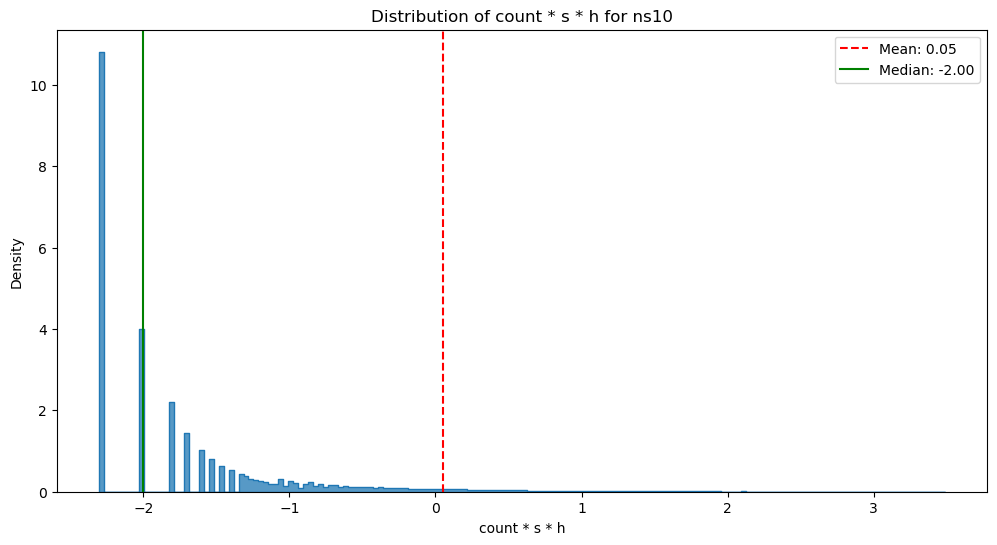

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns10'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns10')
mean_value = combined_df[combined_df['ns']=='ns10']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns10']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {np.log10(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {np.log10(median_value):.2f}')
plt.legend()
plt.show()